In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Quarterly_Census_of_Employment_and_Wages__QCEW_.csv')

In [3]:
code={
    '10':'Not Classified',
    '11':'Agriculture, Forestry, Fishing and Hunting',
    '21':'Mining',
    '22':'Utilities',
    '23':'Construction',
    '31':'Manufacturing',
    '32':'Manufacturing',
    '33':'Manufacturing',
    '42':'Wholesale Trade',
    '44':'Retail Trade',
    '45':'Retail Trade',
    '48':'Transportation and Warehousing',
    '49':'Transportation and Warehousing',
    '51':'Information',
    '52':'Finance and Insurance',
    '53':'Real Estate Rental and Leasing',
    '54':'Professional, Scientific, and Technical Services',
    '55':'Management of Companies and Enterprises',
    '56':'Administrative and Support and Waste Management and Remediation Services',
    '61':'Educational Services',
    '62':'Health Care and Social Assistance',
    '71':'Arts, Entertainment, and Recreation',
    '72':'Accommodation and Food Services',
    '81':'Other Services (except Public Administration)',
    '92':'Public Administration'
}

In [4]:
a=df['NAICS Code'].map(lambda x:x[:2])
df.insert(loc=7, column='First 2 digits of NAICS Code', value=a)
b=df['First 2 digits of NAICS Code'].map(code)
df['Industry']=b

In [5]:
#Data Cleaning

In [6]:
df2=df.drop(df[df['Area Type']!='County'].index)

In [7]:
df3=df2.drop(df2[df2['Quarter']!='Annual'].index)

In [8]:
df4=df3.drop(df3[df3['Ownership']=='Total Covered'].index)

In [9]:
df5=df4.drop(df4[df4['Industry Name']=='Total, All Industries'].index)

In [10]:
df6=df5.drop(df5[df5['Average Weekly Wages']==0.0].index)

In [11]:
#Visualization

In [12]:
dfx=pd.DataFrame(columns=['Year','Industry','Average Annual Wages'])

In [13]:
indtrs=['Agriculture, Forestry, Fishing and Hunting',
    'Mining',
    'Utilities',
    'Construction',
    'Manufacturing',
    'Wholesale Trade',
    'Retail Trade',
    'Transportation and Warehousing',
    'Information',
    'Finance and Insurance',
    'Real Estate Rental and Leasing',
    'Professional, Scientific, and Technical Services',
    'Management of Companies and Enterprises',
    'Administrative and Support and Waste Management and Remediation Services',
    'Educational Services',
    'Health Care and Social Assistance',
    'Arts, Entertainment, and Recreation',
    'Accommodation and Food Services',
    'Other Services (except Public Administration)',
    'Public Administration',
    'Not Classified']

In [14]:
for i in range(2004,2022):
    dfx1=df6.drop(df6[df6['Year']!=i].index)
    for j in indtrs:
        dfx2=dfx1.drop(dfx1[dfx1['Industry']!=j].index)
        avg=dfx2['Total Wages (All Workers)'].sum()/dfx2['Average Monthly Employment'].sum()
        data={
            'Year':i,
            'Industry':j,
            'Average Annual Wages':avg
        }
        data=pd.DataFrame(data,index=[0])
        dfx=pd.concat([dfx,data],ignore_index=True)

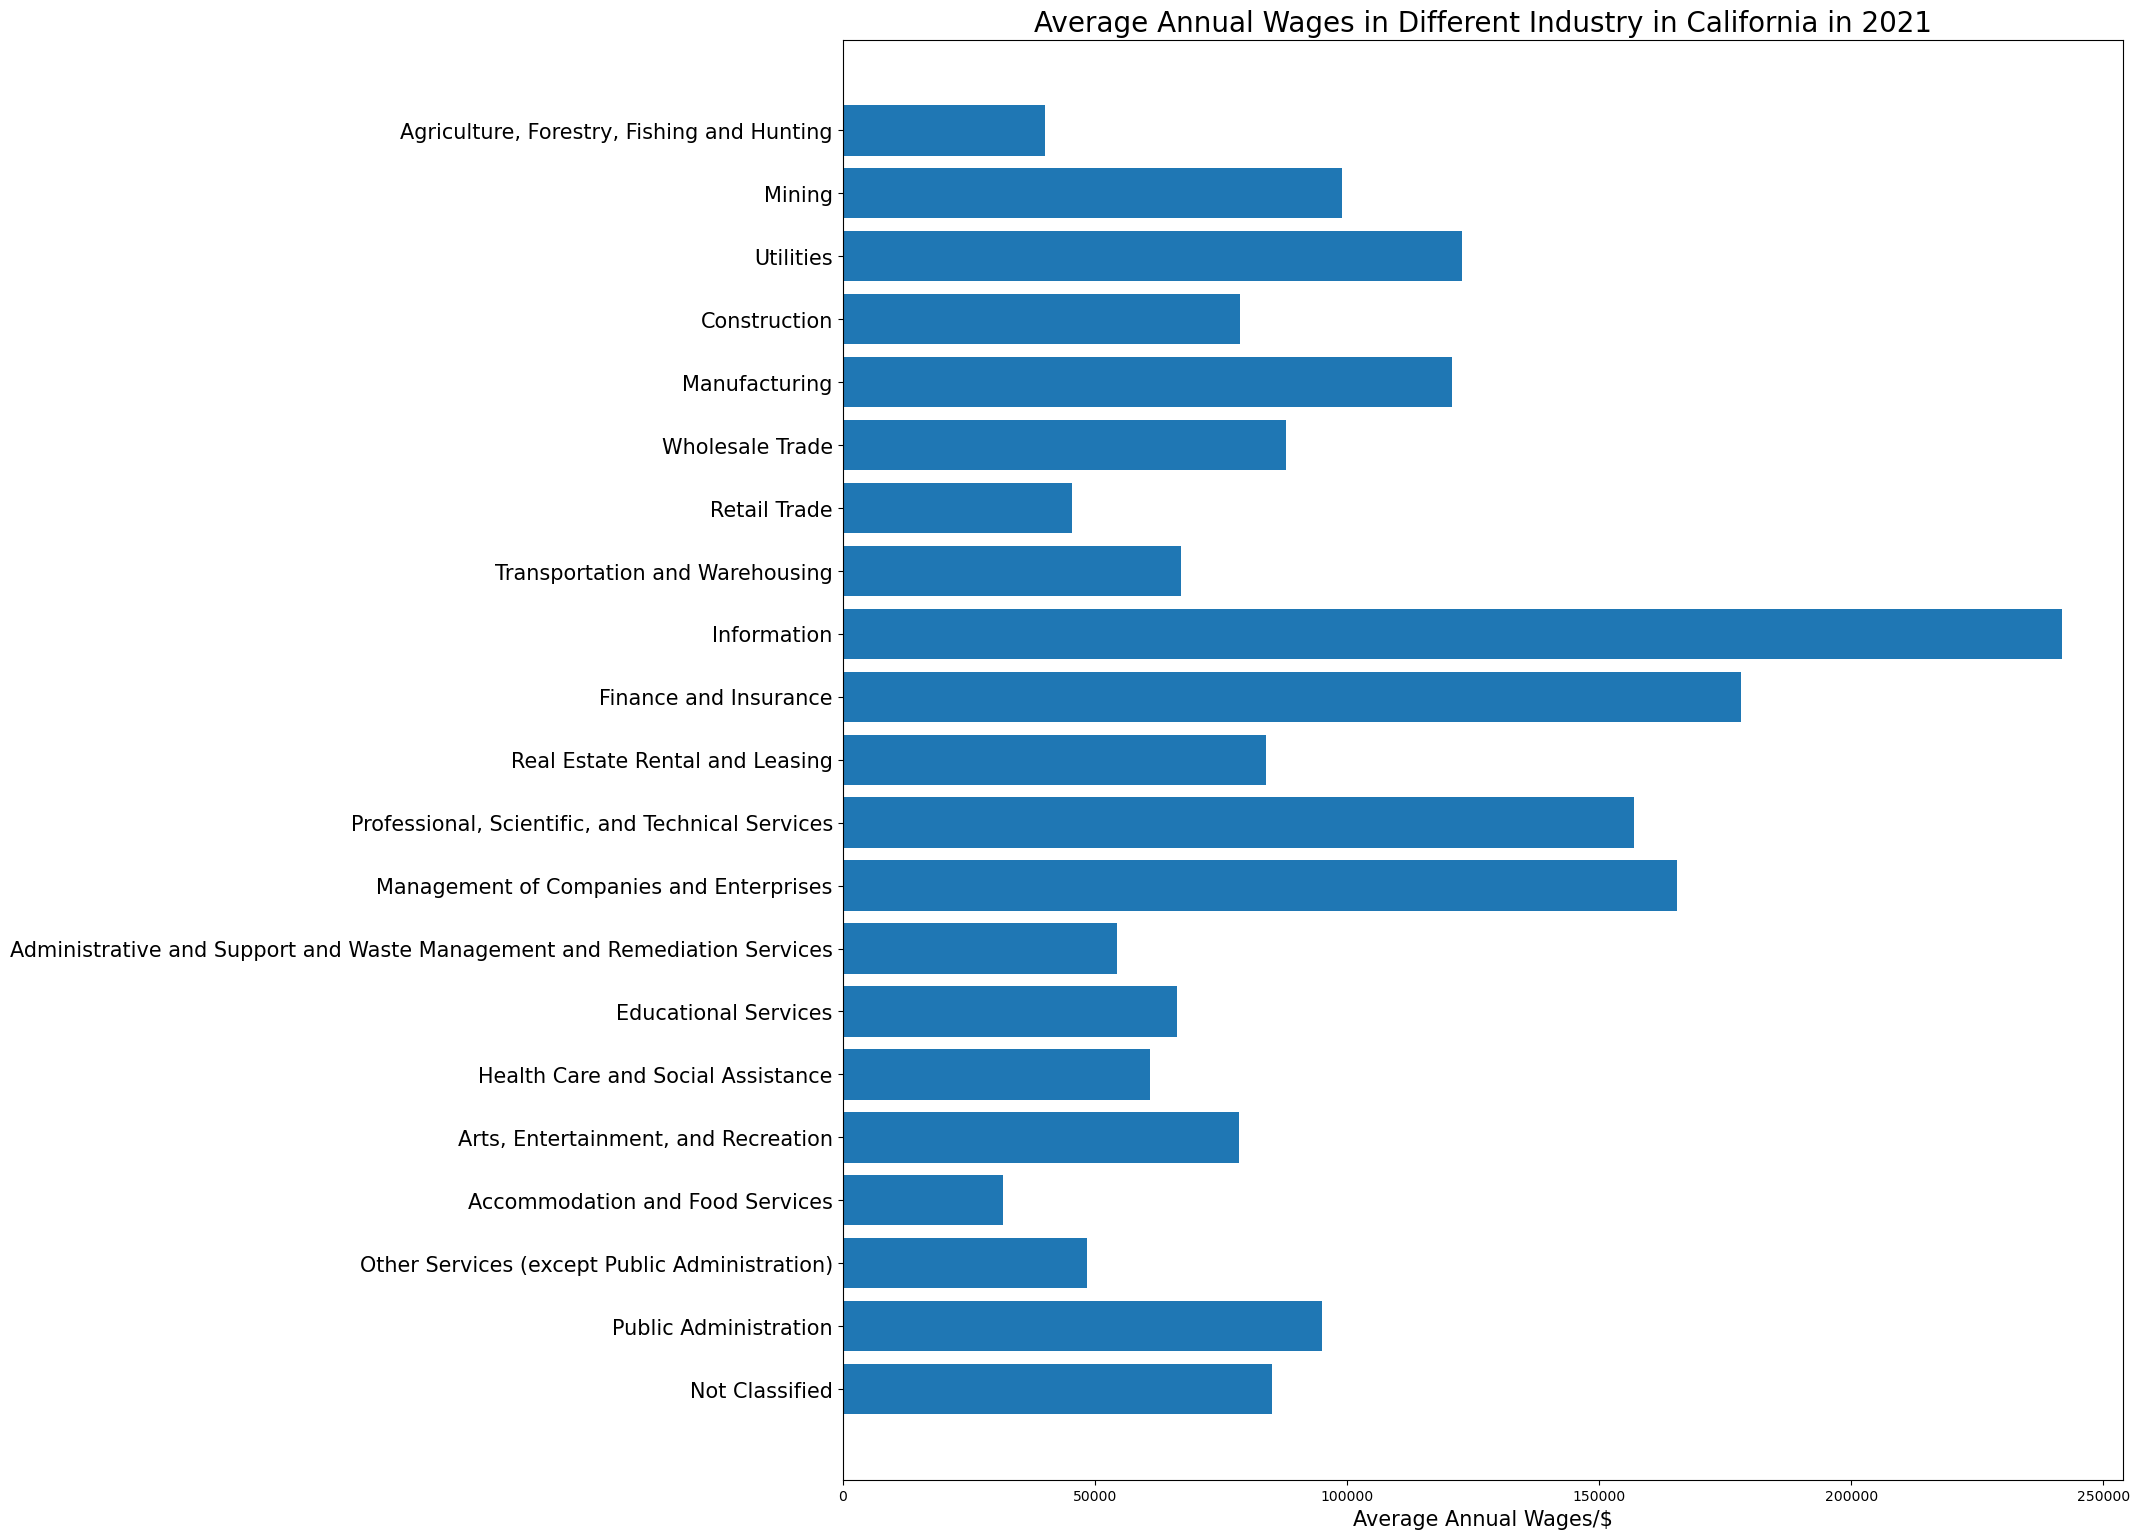

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,3])
wage = [dfx.loc[(dfx['Year']==2021)&(dfx['Industry']==i)]['Average Annual Wages'].max() for i in indtrs]
ax.barh(indtrs[::-1],wage[::-1])
plt.xlabel('Average Annual Wages/$', fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Average Annual Wages in Different Industry in California in 2021',fontsize = 20)
plt.show()

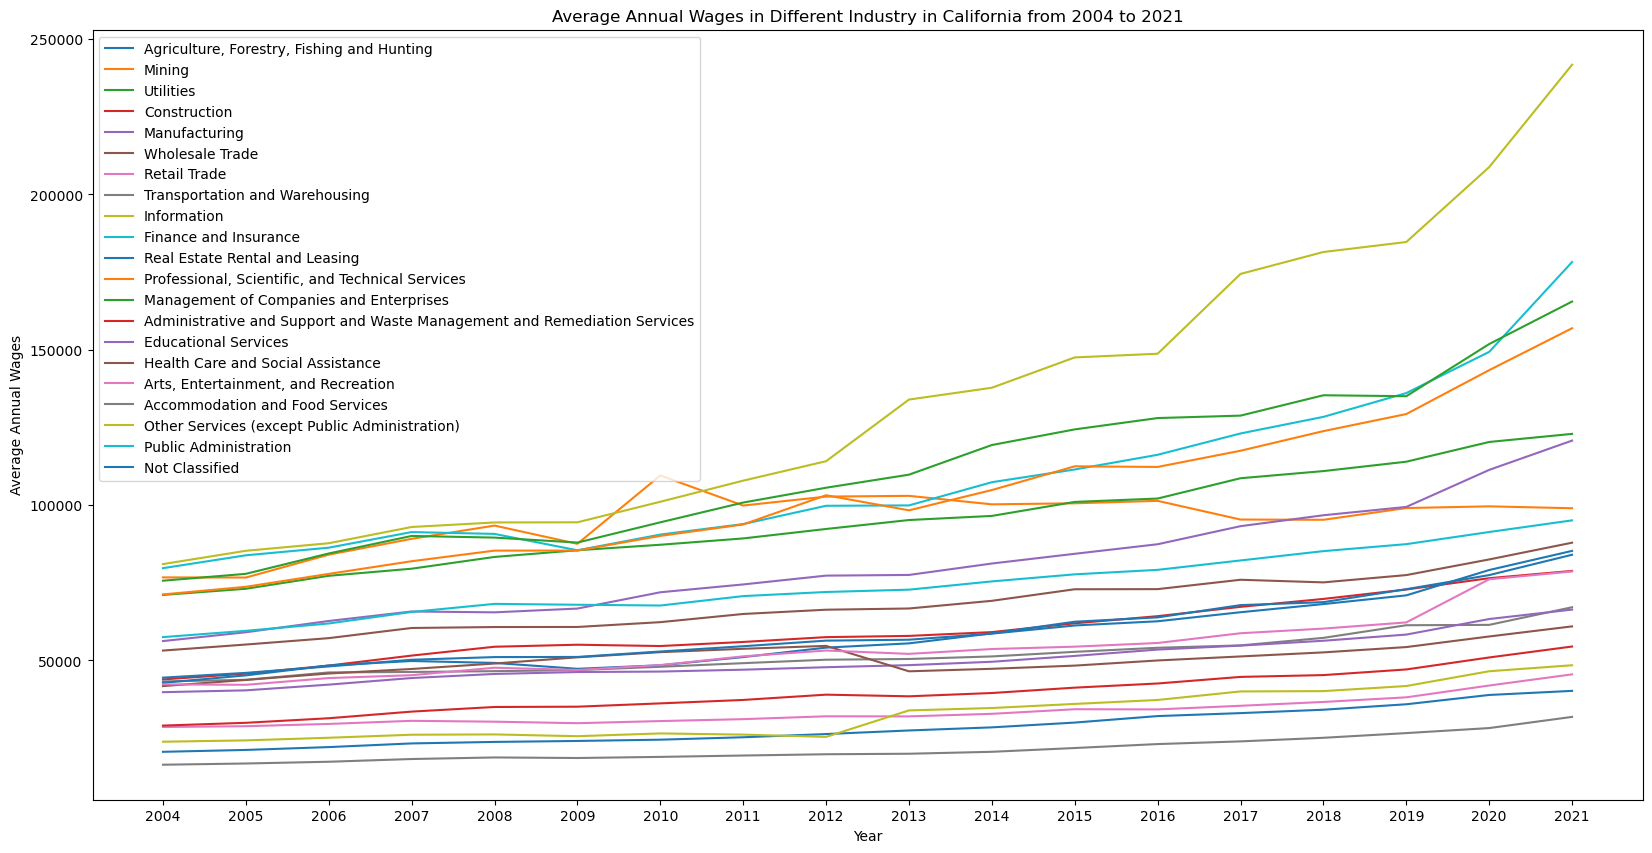

In [18]:
x = list(range(2004,2022,1))
plt.figure(figsize=(20, 10))
for i in indtrs:
    y=[]
    for year in x:
        dc=dfx[dfx['Year']==year]
        y.append(dc[dc['Industry']==i]['Average Annual Wages'].max())
    plt.plot(x, y, markersize=10)
plt.xticks(x)
plt.title('Average Annual Wages in Different Industry in California from 2004 to 2021')
plt.xlabel('Year')
plt.ylabel('Average Annual Wages')
plt.legend(indtrs)
plt.show()

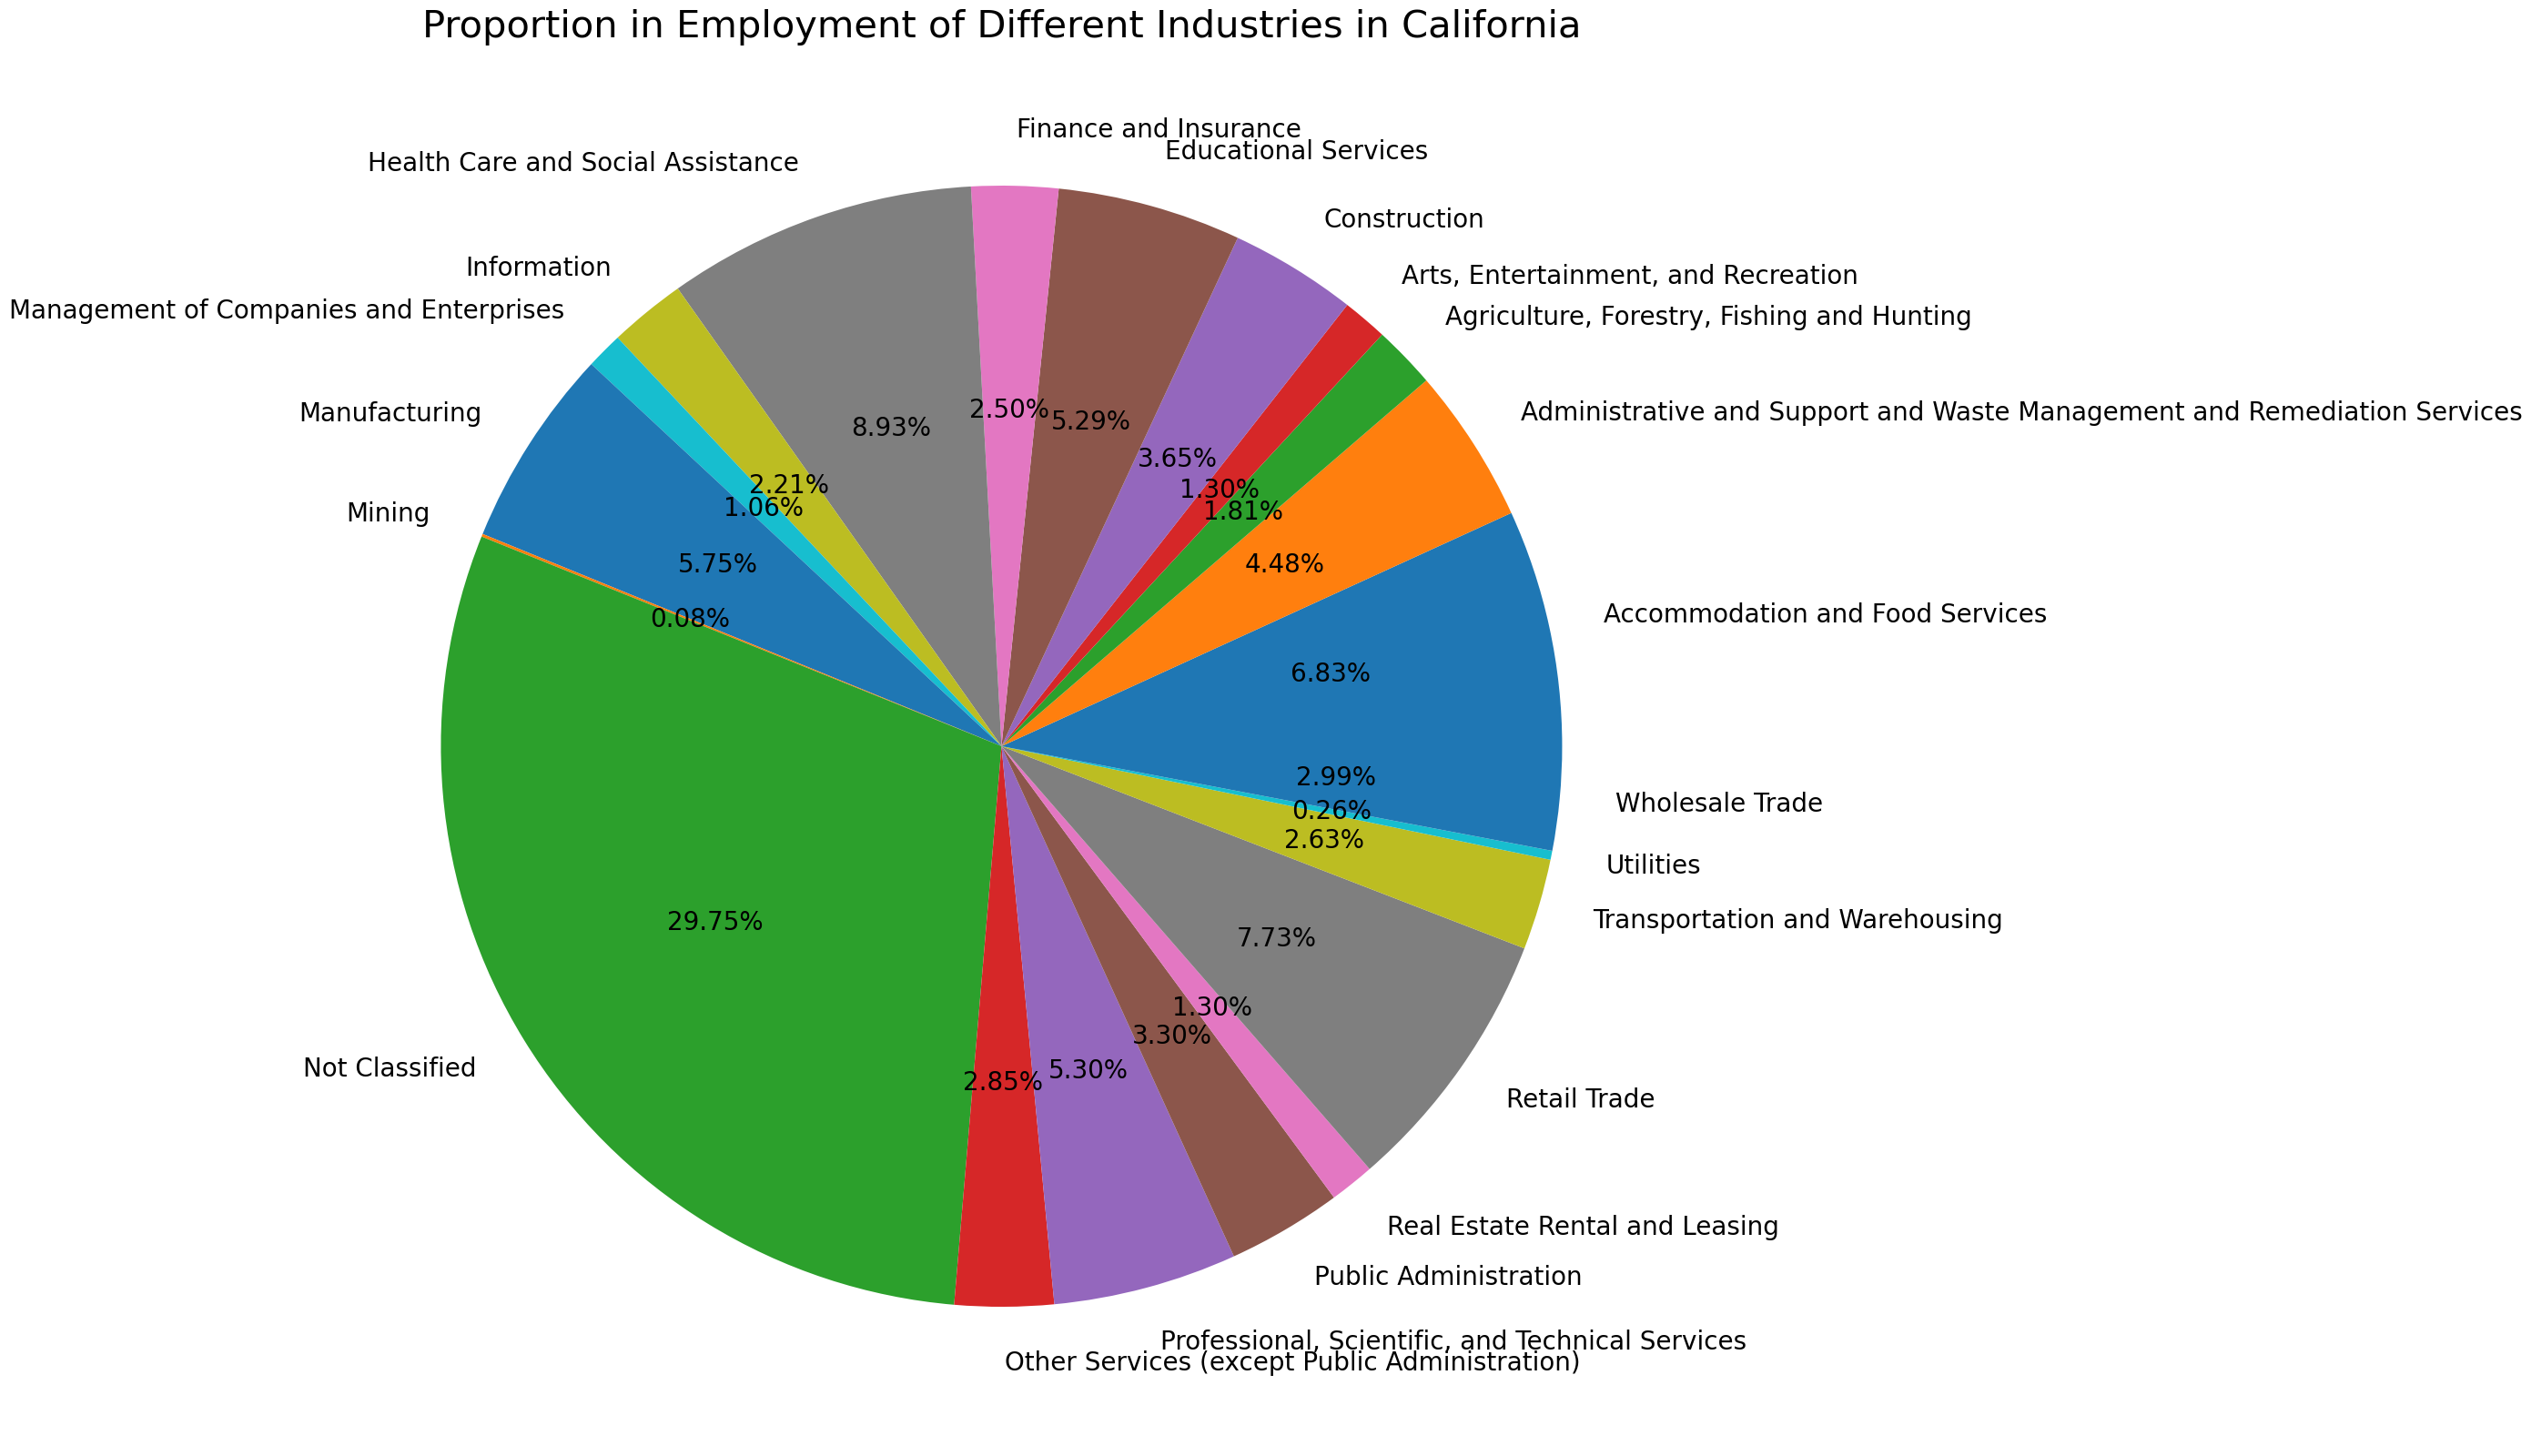

In [19]:
dfy=df5[["Average Monthly Employment","Industry",]].groupby(['Industry']).sum()
plt.figure(figsize=(20, 20))
plt.pie(dfy["Average Monthly Employment"],labels=dfy.index,autopct="%.2f%%",textprops={'fontsize': 20})
plt.title('Proportion in Employment of Different Industries in California',fontsize=30)
plt.show()

In [20]:
dfz=dfy[dfy.index!='Not Classified']


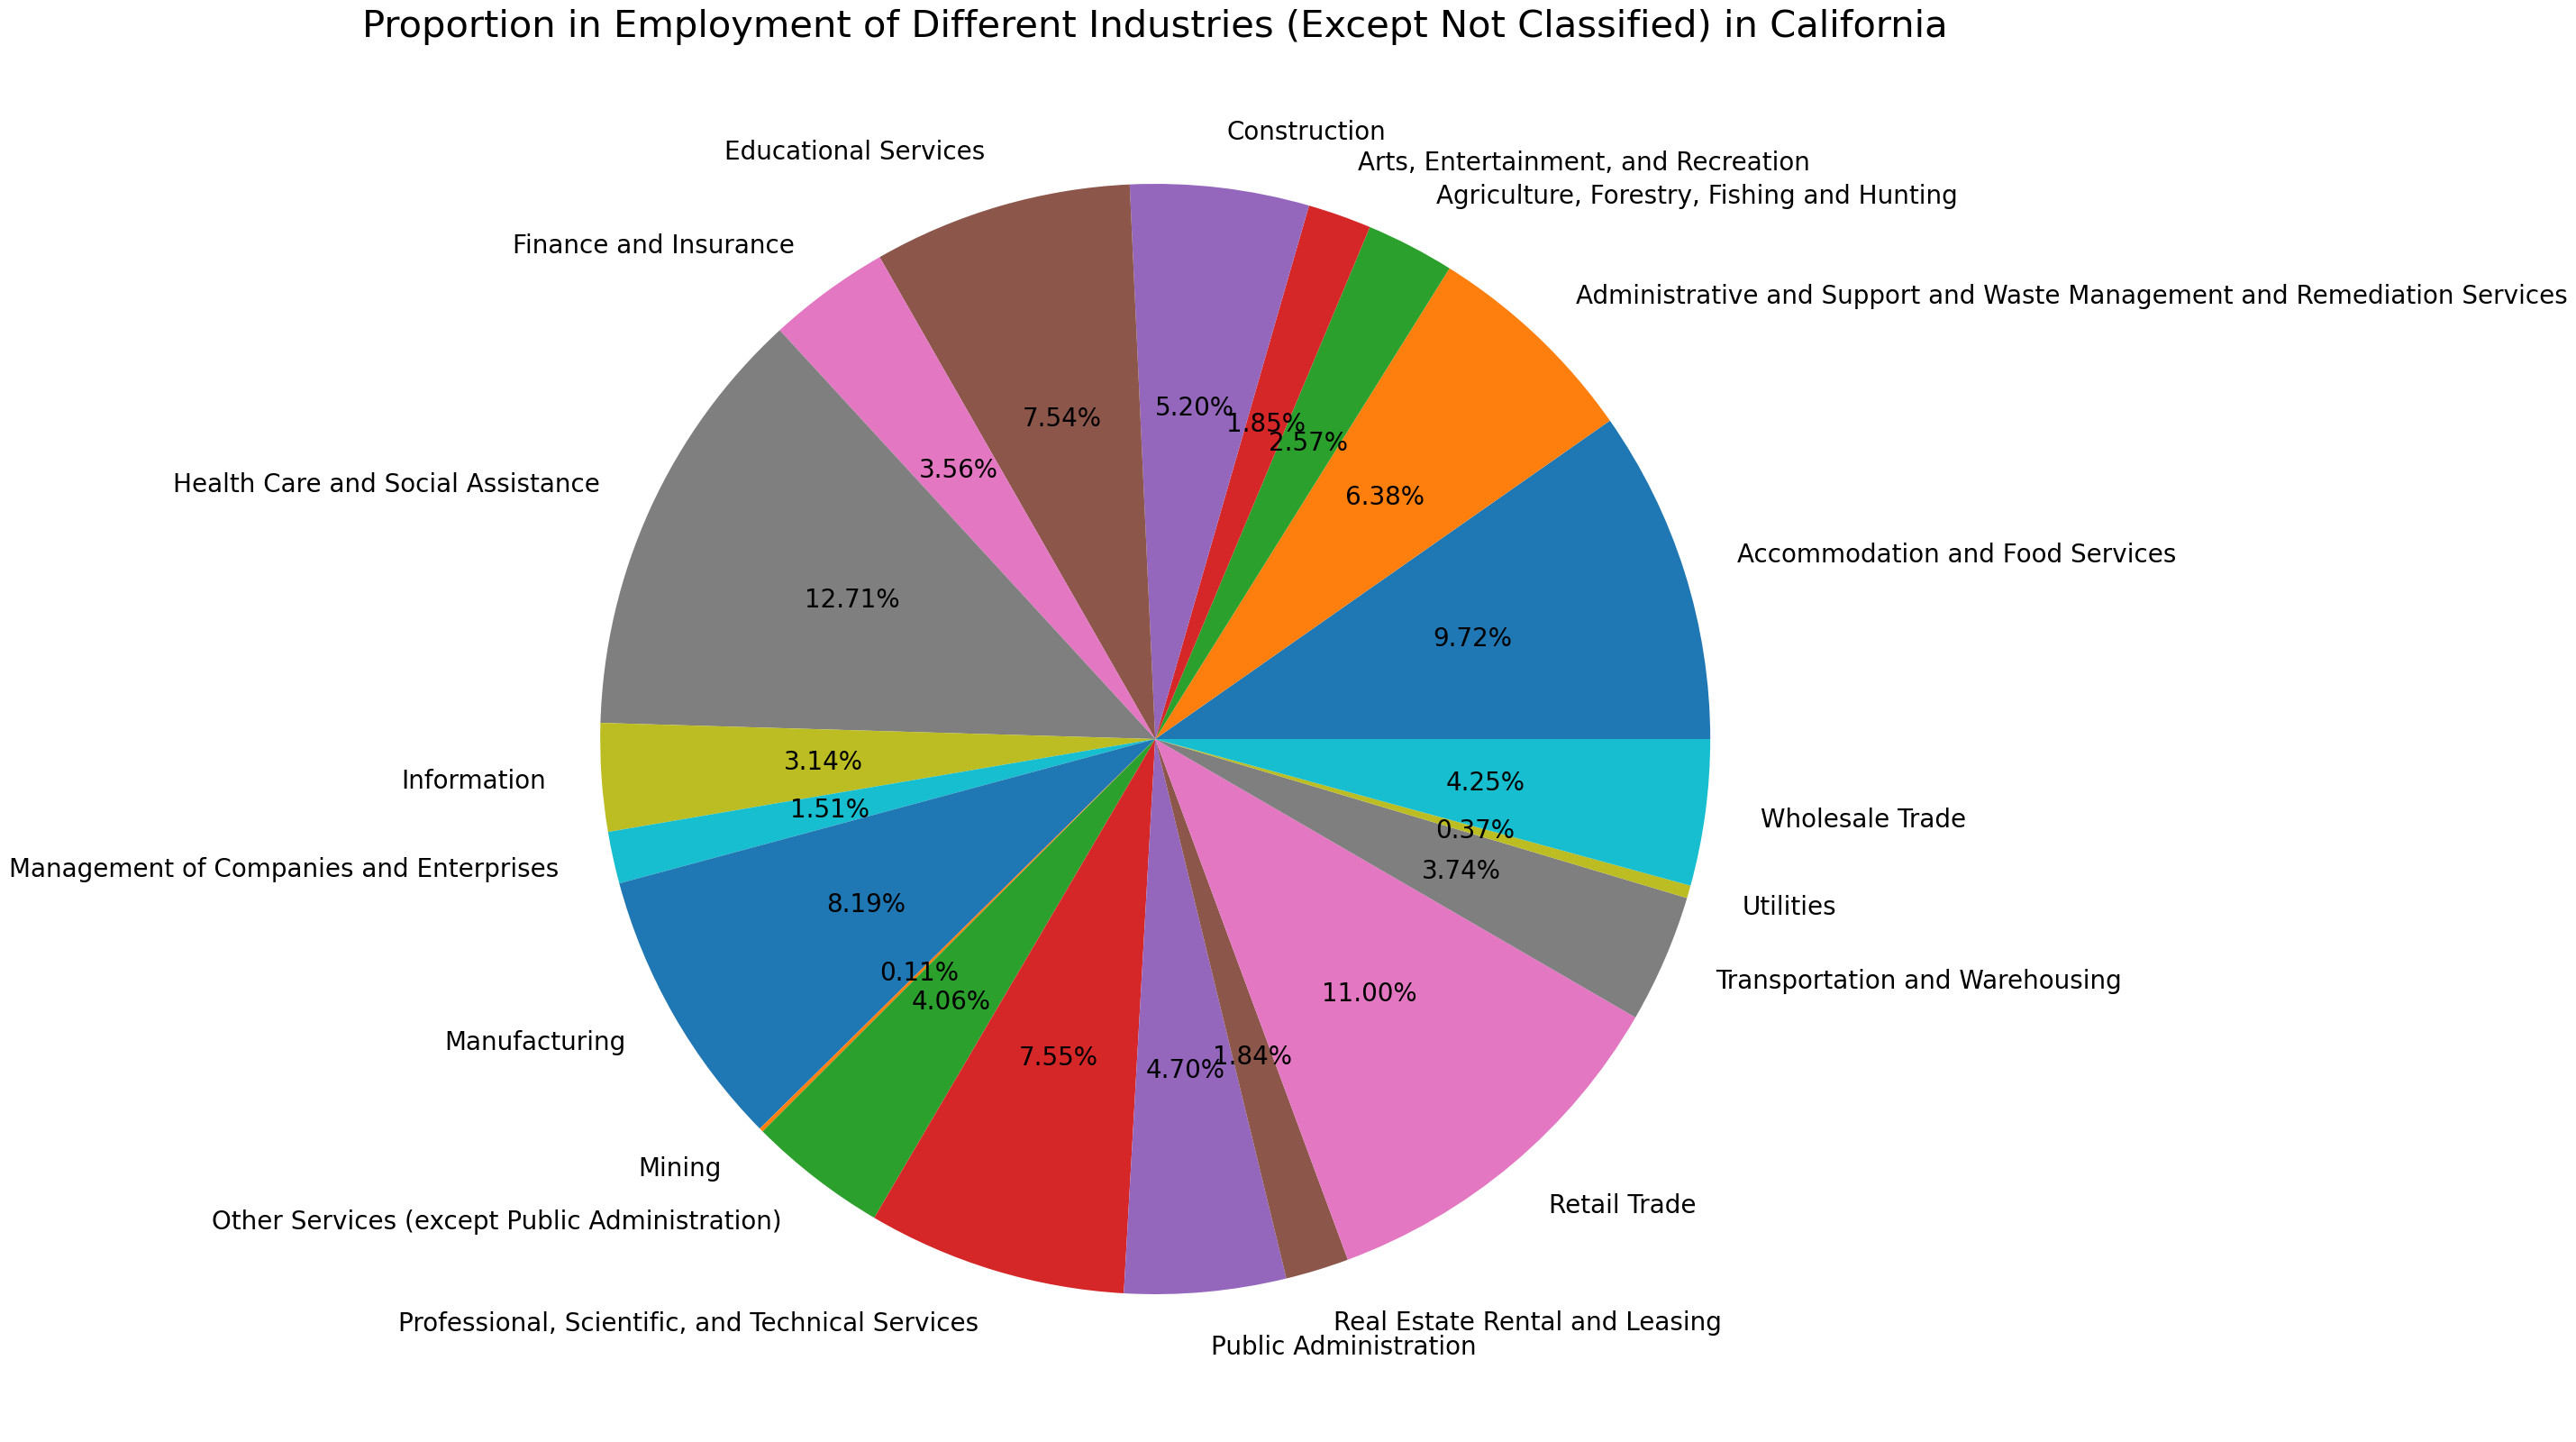

In [21]:
plt.figure(figsize=(20, 20))
plt.pie(dfz["Average Monthly Employment"],labels=dfz.index,autopct="%.2f%%",textprops={'fontsize': 20})
plt.title('Proportion in Employment of Different Industries (Except Not Classified) in California',fontsize=30)
plt.show()

In [22]:
dfi=df5
dfi['NAICS Code(int)']=dfi['NAICS Code'].map(lambda x:int(x[:2])if len(x)>=3 and x[2]=='-' else int(x))
dfi=dfi[dfi['NAICS Code(int)']<100]
dfi=dfi[["Average Monthly Employment","Industry","Year"]].groupby(['Industry',"Year"]).sum()
dfi

Average Monthly Employment
Industry                        Year                            
Accommodation and Food Services 2004                     1189082
                                2005                     1224123
                                2006                     1267300
                                2007                     1300649
                                2008                     1308571
...                                                          ...
Wholesale Trade                 2017                      645736
                                2018                      636714
                                2019                      629744
                                2020                      573942
                                2021                      581143

[360 rows x 1 columns]

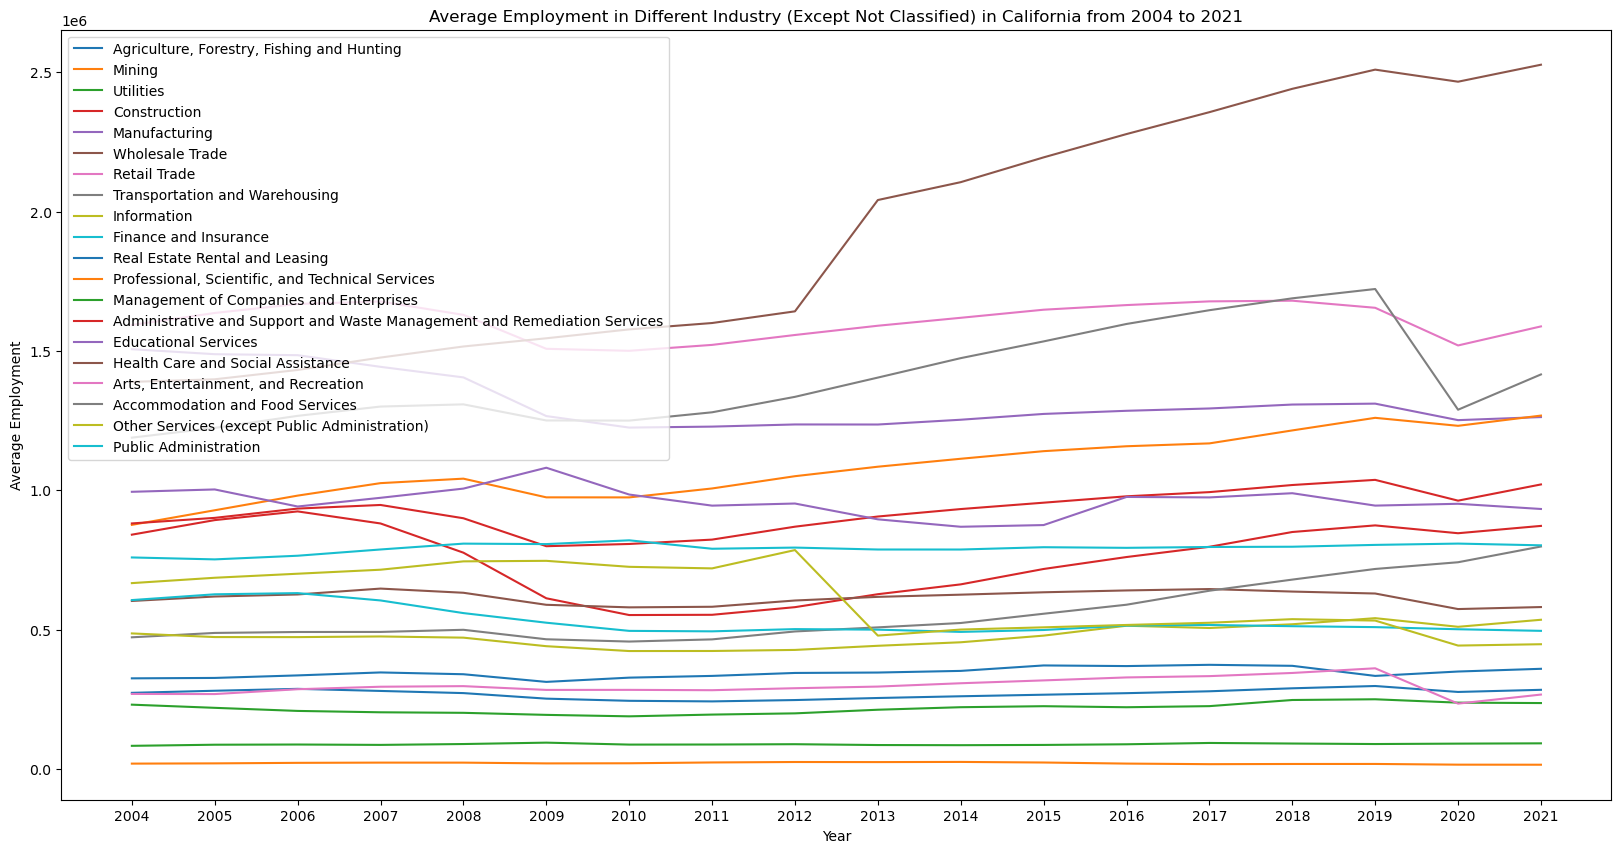

In [24]:
x = list(range(2004,2022,1))
l = indtrs[:]
l.remove('Not Classified')
plt.figure(figsize=(20, 10))
for i in l:
    y=[]
    dc=dfi.loc[i]
    for year in x:
        y.append(dc.loc[year]['Average Monthly Employment'])
    plt.plot(x, y, markersize=10)
plt.xticks(x)
plt.title('Average Employment in Different Industry (Except Not Classified) in California from 2004 to 2021')
plt.xlabel('Year')
plt.ylabel('Average Employment')
plt.legend(indtrs)
plt.show()